<a href="https://colab.research.google.com/github/sneraikar/Yes-Bank-Stock-prediction/blob/main/Yes_Bank_Stock_closing_Price_Prediction(Regression).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Title : "Yes Bank Stock Closing Price Prediction - Supervised ML Regression"**

**Problem Statement**

> Yes Bank is a well-known bank in the Indian financial domain.Since 2018,it has been in the news because of the fraud case involving Rana Kapoor.Owing to this fact,it was interesting to see how that impacted the stock prices of the company and whether Time series models or any other predictive models can do justice to such situations.This dataset has monthly stock prices of the bank since its inception and includes closing,starting,highest and lowest stock prices of every month.The main objective is to predict the stock's closing price of the month.

**Solution**

Stock market analysis is categorised into two parts: Fundamental and Technical Analysis.
>**Fundamental Analysis** : It is about analysing the company's future profitability based on its current business conditions.
>**Technical Analysis** : It includes reading the charts and using statistical figures to identify the trends in the stock market.

>In this project we are referring to Technical analysis.

**First and foremost import all necessary libraries**

In [86]:
#Import all necessary libraries for the project
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime
from datetime import date

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression,Ridge,Lasso

**Mouting drive and reading given csv file**

In [87]:
#mount drive to colab notebook
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [88]:
#read datset using pandas function
file_path="/content/drive/MyDrive/Supervised ML - Regression/"
df=pd.read_csv(file_path+"data_YesBank_StockPrices.csv")


**Make a copy of the datset**

In [89]:
#create a backup of the data incase of loss of data
df_backup=df.copy()
df_backup.head(4)

,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99


#Exploratory Data Analysis

**First 5 observations of dataset**

In [90]:
#to print five observations from the top
df.head(5)

,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41


In [91]:
#to print last 5 observations of the dataset
df.tail(5)

,Date,Open,High,Low,Close
180,Jul-20,25.60,28.30,11.10,11.95
181,Aug-20,12.00,17.16,11.85,14.37
182,Sep-20,14.30,15.34,12.75,13.15
183,Oct-20,13.30,14.01,12.11,12.42
184,Nov-20,12.41,14.90,12.21,14.67


**To get basic information about dataset**

In [92]:
#basic information about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    185 non-null    object 
 1   Open    185 non-null    float64
 2   High    185 non-null    float64
 3   Low     185 non-null    float64
 4   Close   185 non-null    float64
dtypes: float64(4), object(1)
memory usage: 7.4+ KB


#1.Data summary
> Dataset has **5 features and 185 observations** for each feature.

> Features given are : **Date , Open,	High, Low,	Close**

> <code><b> Date </code> </b> : Month and Year when the prices were recorded.

> <code><b> Open </code> </b> : Opening stock price of the month

> <code><b> High </code></b> : Highest stock price of the month

> <code><b> Open </code></b> : Lowest stock price of the month

 > <code><b> Close </code> </b> : Closing stock price of the month

**Datatype**
 > prices are given in float datatype.

 > <code><b> Date </code> </b> is in object datatype

#2.Data preprocessing

**2.1 Handling null values**

In [93]:
#check if any null values are present
df.isnull().sum()

Date     0
Open     0
High     0
Low      0
Close    0
dtype: int64

**There are no null values in the given dataset**

**2.2 Datatype handling**

In [94]:
#Let us convert feature called "Date" to Datetime datatype from object datatype
df["Date"][:6]

0    Jul-05
1    Aug-05
2    Sep-05
3    Oct-05
4    Nov-05
5    Dec-05
Name: Date, dtype: object

In [95]:
#use datetime to convert from 'object' dtype to 'datetime64' dtype 
df["Date"]=pd.to_datetime(df["Date"],format='%b-%y')
df.head()

,Date,Open,High,Low,Close
0,2005-07-01,13.00,14.00,11.25,12.46
1,2005-08-01,12.58,14.88,12.55,13.42
2,2005-09-01,13.48,14.87,12.27,13.30
3,2005-10-01,13.20,14.47,12.40,12.99
4,2005-11-01,13.35,13.88,12.88,13.41


In [96]:
#to check if datatype has been changed or not
df["Date"][:6]

0   2005-07-01
1   2005-08-01
2   2005-09-01
3   2005-10-01
4   2005-11-01
5   2005-12-01
Name: Date, dtype: datetime64[ns]

For feature "Date" datatype has been successfully changed from object to datetime64.

**2.3 Handling Outliers**

>**To see if any outliers are present using boxplot**

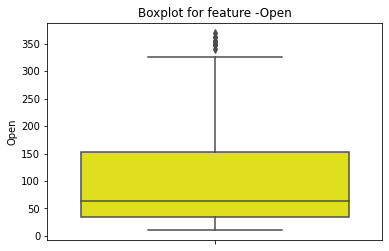

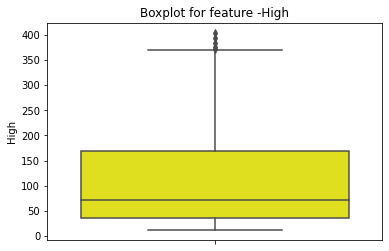

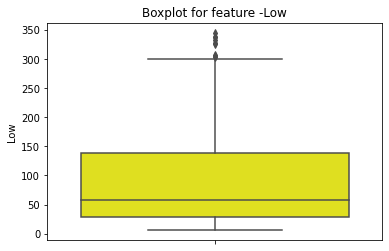

In [97]:
#boxplot for independent variables
features=["Open","High","Low"]
for i in features:
  sns.boxplot(y=i,data=df,color="yellow")
  plt.title(f"Boxplot for feature -{i}")
  plt.show()

From the box plot we can observe that significantly less outliers are present.

**2.4 Checking correlation**

We will use heatmap to check correlation among variables.

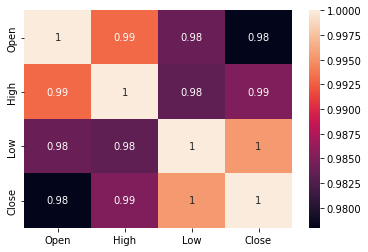

In [100]:
#plot heatmap for correlation
sns.heatmap(df.corr(),annot=True)